In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [98]:
%pip install ucimlrepo

# Загрузка данных


In [99]:
# Датасет "Рецидивы дифференцированного рака щитовидной железы"
from ucimlrepo import fetch_ucirepo

differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)
df = pd.merge(
    differentiated_thyroid_cancer_recurrence.data.features,
    differentiated_thyroid_cancer_recurrence.data.targets,
    how='inner',
    left_index=True, right_index=True
)
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


```
Gender:
  F, M

Smoking:
  No, Yes

Hx Smoking:
  No, Yes

Hx Radiothreapy:
  No, Yes

Thyroid Function:
  Clinical Hyperthyroidism, Clinical Hypothyroidism, Euthyroid, Subclinical Hyperthyroidism, Subclinical Hypothyroidism

Physical Examination:
  Diffuse goiter, Multinodular goiter, Normal, Single nodular goiter-left, Single nodular goiter-right

Adenopathy:
  Bilateral, Extensive, Left, No, Posterior, Right

Pathology:
  Follicular, Hurthel cell, Micropapillary, Papillary

Focality:
  Multi-Focal, Uni-Focal

Risk:
  High, Intermediate, Low

T:
  T1a, T1b, T2, T3a, T3b, T4a, T4b

N:
  N0, N1a, N1b

M:
  M0, M1

Stage:
  I, II, III, IVA, IVB

Response:
  Biochemical Incomplete, Excellent, Indeterminate, Structural Incomplete

Recurred:
  No, Yes
```



# Кодирование категориальных данных и нормализация

In [100]:
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df[cat_columns] = df[cat_columns].apply ( lambda x: pd.factorize (x)[ 0 ])
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [101]:
df = df / df.abs().max()
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.329268,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.414634,0.0,0.0,1.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
2,0.365854,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
3,0.756098,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
4,0.756098,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0


# Анализ данных

In [102]:
df['Recurred'].value_counts()

,count
Recurred,
0.0,275
1.0,108


In [103]:
df = df.iloc[179:]
df['Recurred'].value_counts()

,count
Recurred,
0.0,102
1.0,102


# Визуализация данных

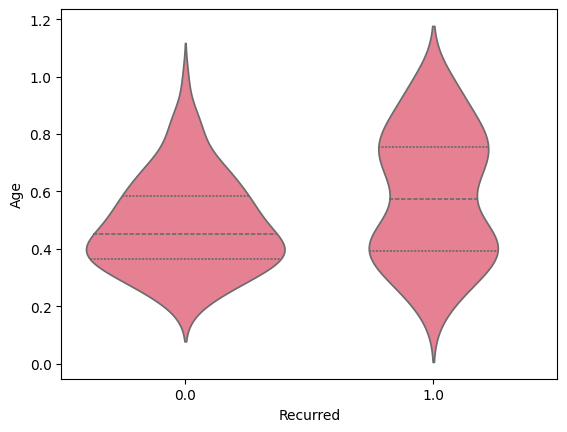

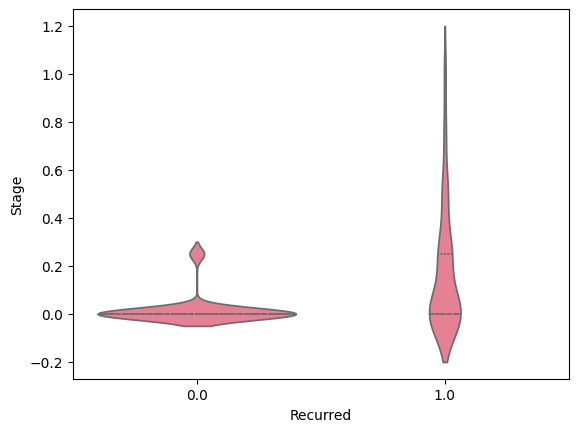

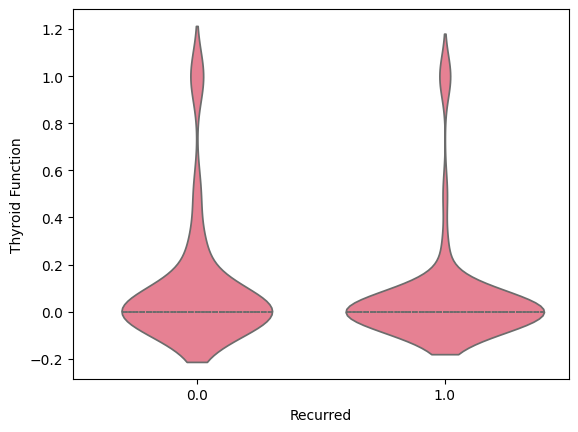

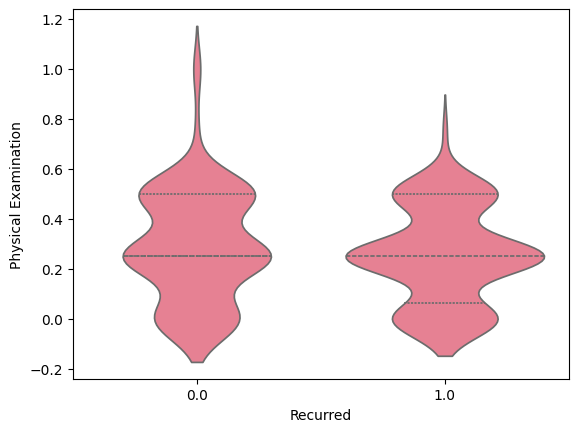

In [104]:
sns.violinplot(y='Age', x='Recurred', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Stage', x='Recurred', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Thyroid Function', x='Recurred', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Physical Examination', x='Recurred', data=df, inner='quartile')
plt.show()

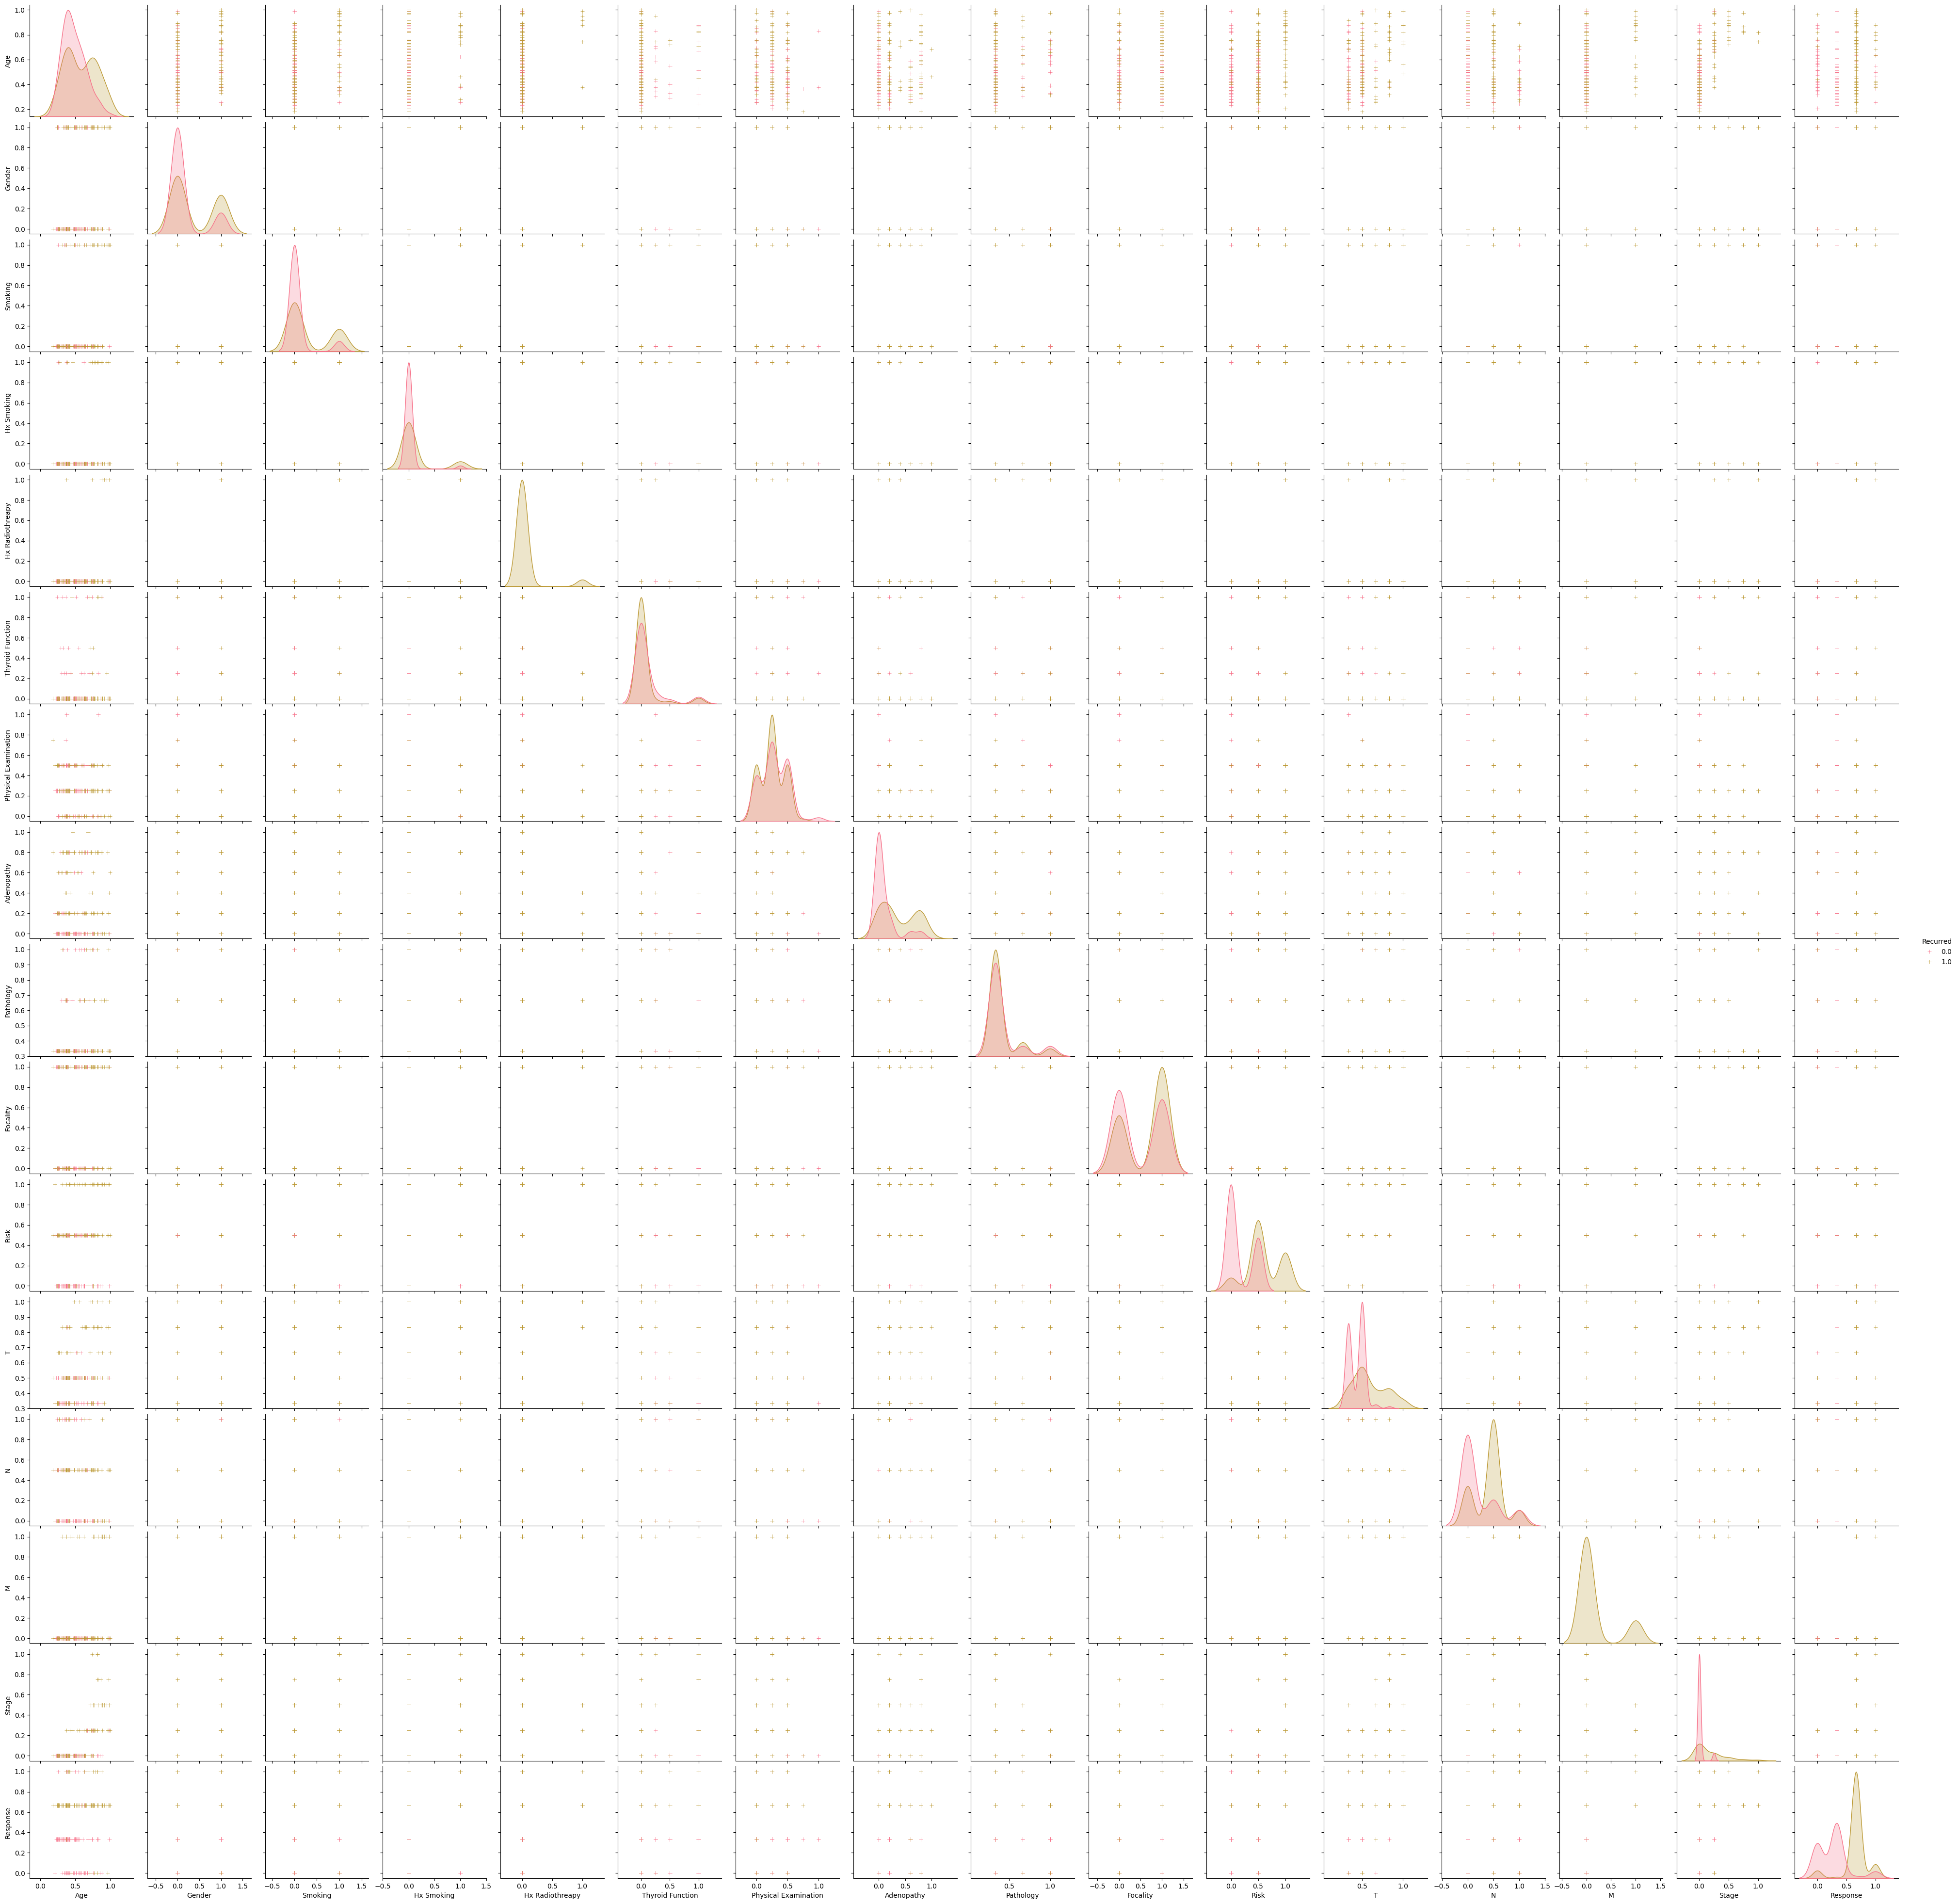

In [105]:
sns.pairplot(df, hue='Recurred', markers='+')
plt.show()

Видим, что Iris-Setosa отличается от обоих других видов по всем признакам.

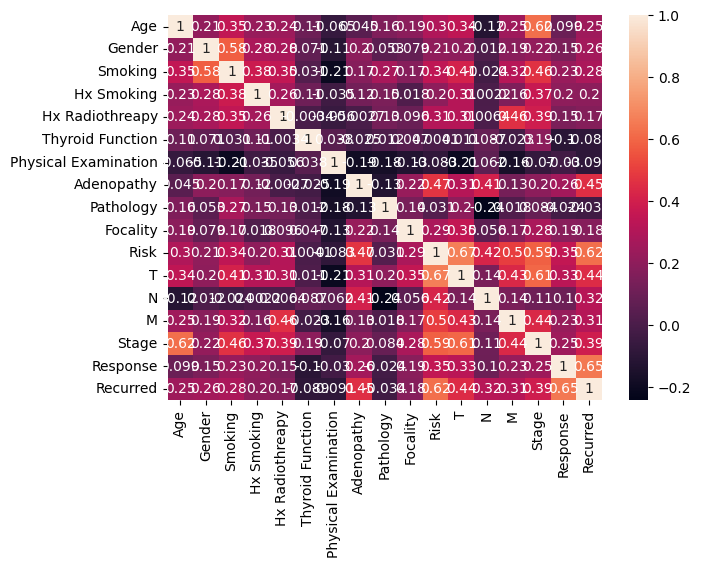

In [106]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

In [107]:
df = df.sample(frac=1)
X = df.drop(['Recurred'], axis=1)
y = df['Recurred']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [109]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.859191 (0.061652)
LDA: 0.852941 (0.048912)
KNN: 0.773162 (0.114892)
CART: 0.865074 (0.060769)
NB: 0.649632 (0.087389)
SVC: 0.852941 (0.062888)


## Обучение конкретной модели

In [110]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

print(f'LR accuracy: {acc}')

LR accuracy: 0.926829268292683


In [111]:
recall = metrics.recall_score(y_test, pred, average="weighted")
precision = metrics.precision_score(y_test, pred, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")

print(metrics.classification_report(y_test, pred, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.93
Precision (confidence when predicting a 1): 0.93
Detail:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        23
         1.0       0.94      0.89      0.91        18

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.93        41
weighted avg       0.93      0.93      0.93        41

